## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [123]:
len(x_train)

60000

In [124]:
len(x_test)

10000

### Find dimensions of an image in the dataset

In [125]:
print("Fashion MNIST train -  rows:",x_train.shape[0]," columns:", x_train.shape[1:4])
print("Fashion MNIST test -  rows:",x_test.shape[0]," columns:", x_test.shape[1:4])

Fashion MNIST train -  rows: 60000  columns: (28, 28)
Fashion MNIST test -  rows: 10000  columns: (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import tensorflow as tf
tf.set_random_seed(42)
import keras

In [0]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32') / 255

In [0]:
x_test = x_test.astype('float32') / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0],  28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout
from keras.layers import Flatten, InputLayer, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.initializers import Constant
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [132]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=10)
callbacks = [EarlyStopping(patience=5)]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 315us/step - loss: 0

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [133]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=10)
callbacks = [EarlyStopping(patience=5)]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rotation_range=50,width_shift_range=0.1,vertical_flip=False)
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

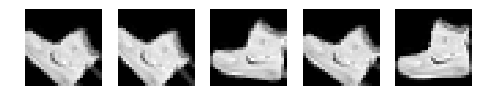

In [135]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [136]:
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=10),steps_per_epoch=x_train.shape[0], epochs=1,verbose = 1,validation_data = (x_test, y_test))

Epoch 1/1
60000/60000 [==============================] - 559s 9ms/step - loss: 0.4274 - acc: 0.8459 - val_loss: 1.8414 - val_acc: 0.4035


###  Report the final train and validation accuracy

In [137]:
print('\n', 'Training accuracy:', history.history['acc'])


 Training accuracy: [0.8459183280629416]


In [138]:
print('\n', 'validation accuracy:', history.history['val_acc'])


 validation accuracy: [0.40350000662356617]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [116]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(rotation_range=50,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True) 

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

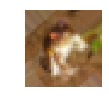

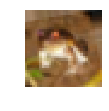

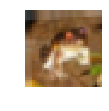

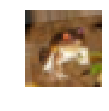

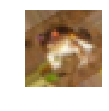

In [119]:
from __future__ import absolute_import, division, print_function
from matplotlib import pyplot as plt
from scipy.misc import toimage
gen = data_gen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
    plt.show()

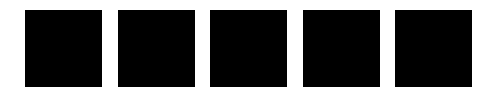